In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spudtr.filters as filters
import mne

 bandpass filter
 sample rate, fs=250 
 cutoff_hz = [0.5, 3] 
 width of transition, width=1.25 hz 
 ripple_db=53
 FIR filter size: numtaps = 629, time = 2.516 s, delay = 314 , delay_time = 1.258 s
 Filter length=629 distorts the first and last 1.2560  seconds of each epoch (= 314 samples at 250 samples / s)
Setting up band-pass filter from 0.5 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 1651 samples (6.604 sec)

 bandpass filter
 sample rate, fs=250 
 cutoff_hz = [3.5, 7.5] 
 width of transition, width=2.0 hz 
 ripple_db=53
 FIR filter size: numtaps = 395, time = 1.58 s, delay = 19

<ipython-input-2-dd59a1065fc6>:42: RuntimeWarning: filter_length (1651) is longer than the signal (375), distortion is likely. Reduce filter length or filter a longer signal.
  data_filtered = mne.filter.filter_data(y, sfreq, fmin, fmax)
<ipython-input-2-dd59a1065fc6>:42: RuntimeWarning: filter_length (413) is longer than the signal (375), distortion is likely. Reduce filter length or filter a longer signal.
  data_filtered = mne.filter.filter_data(y, sfreq, fmin, fmax)


 bandpass filter
 sample rate, fs=250 
 cutoff_hz = [7.5, 13] 
 width of transition, width=2.625 hz 
 ripple_db=53
 FIR filter size: numtaps = 301, time = 1.204 s, delay = 150 , delay_time = 0.602 s
 Filter length=301 distorts the first and last 0.6000  seconds of each epoch (= 150 samples at 250 samples / s)
Setting up band-pass filter from 7.5 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.50
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 sec)

 bandpass filter
 sample rate, fs=250 
 cutoff_hz = [14, 25] 
 width of transition, width=4.875 hz 
 ripple_db=53
 FIR filter size: numtaps = 163, time = 0.652 s, delay

<ipython-input-2-dd59a1065fc6>:42: RuntimeWarning: filter_length (413) is longer than the signal (375), distortion is likely. Reduce filter length or filter a longer signal.
  data_filtered = mne.filter.filter_data(y, sfreq, fmin, fmax)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 111 samples (0.444 sec)



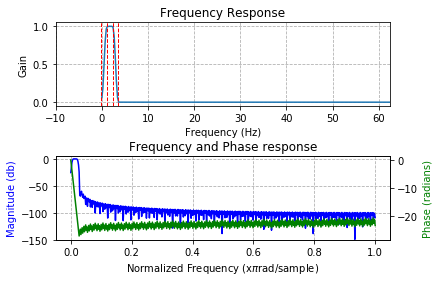

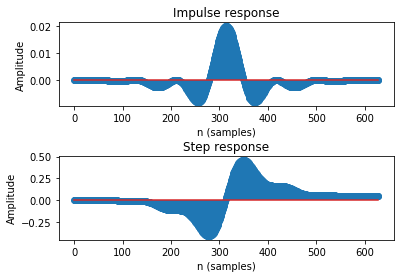

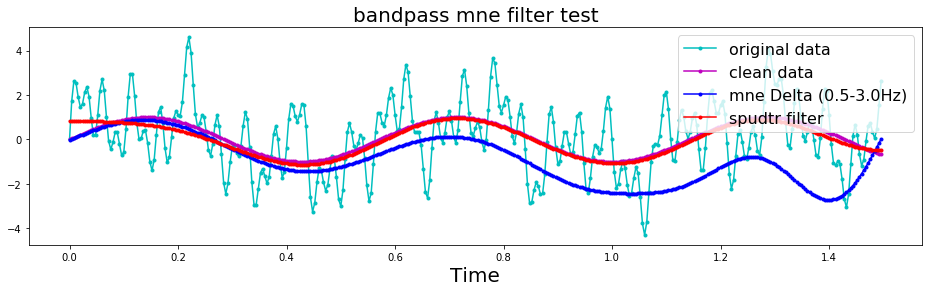

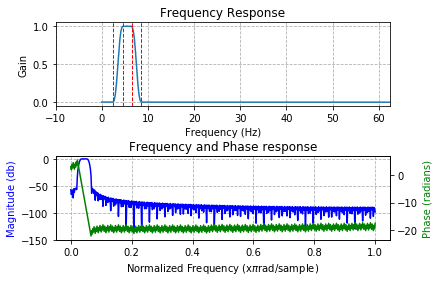

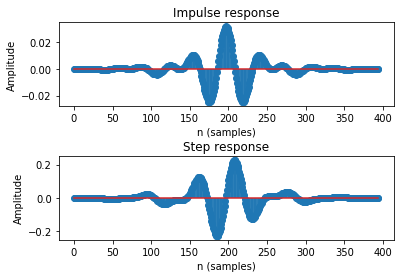

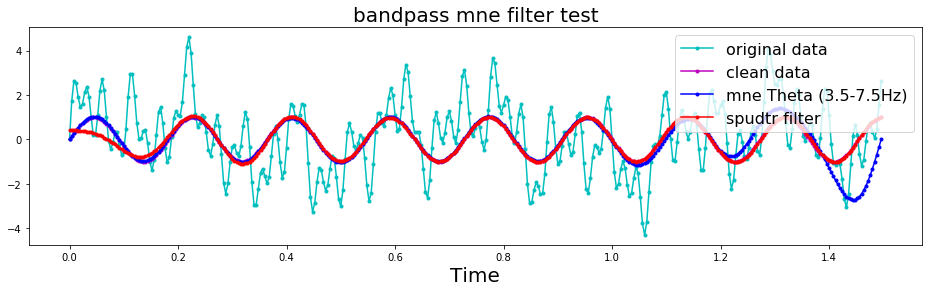

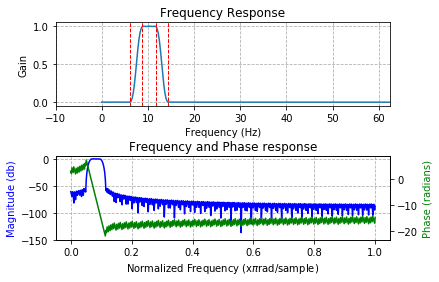

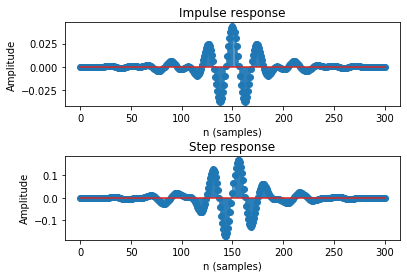

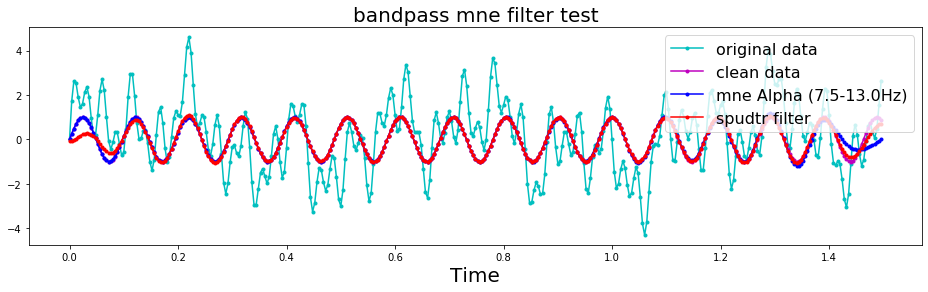

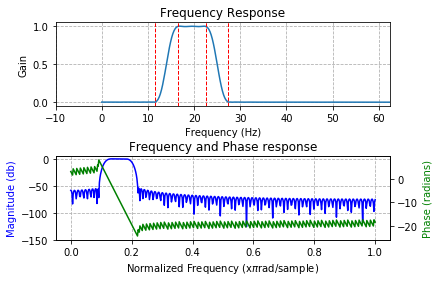

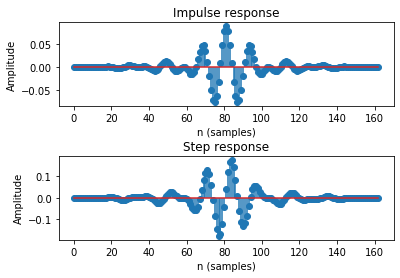

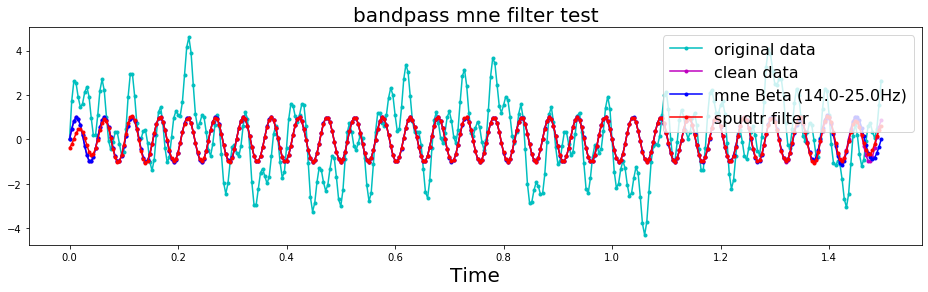

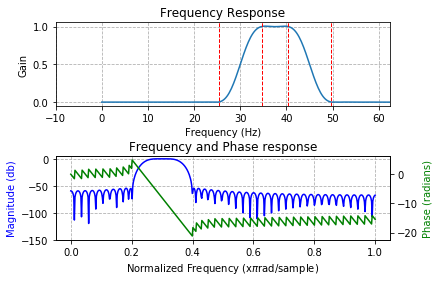

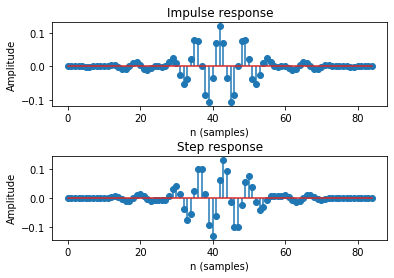

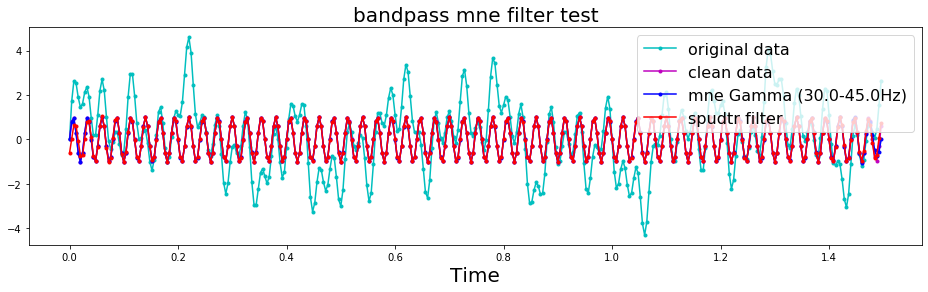

In [2]:
iter_freqs = [
    ('Delta', 0.5, 3),
    ('Theta', 3.5, 7.5),
    ('Alpha', 7.5, 13),
    ('Beta', 14, 25),
    ('Gamma', 30, 45)
]
# let's explore some frequency bands
freq_list = list()
for band, fmin, fmax in iter_freqs:
    freq_list.append((fmin + fmax)/2)
amplitude_list = [1.0]*len(iter_freqs)
sampling_freq = 250
t, y = filters._sins_test_data(freq_list, amplitude_list, sampling_freq)

sfreq = 250
for band, fmin, fmax in iter_freqs:
    freq_list1 = list()
    amplitude_list1 = list()
    freq_list1.append((fmin + fmax)/2)
    amplitude_list1 = [1.0]
    t, y1 = filters._sins_test_data(freq_list1, amplitude_list1, sampling_freq)
    
    ftype = "bandpass"
    cutoff_hz = [fmin, fmax]
    sfreq = sampling_freq

    testdata = pd.DataFrame({"fakedata": y})
    filt_test_df = filters.fir_filter_df(
    testdata,
    ["fakedata"],
    cutoff_hz,
    sfreq,
    ftype
    )
    y_filt = filt_test_df["fakedata"]
    filters.filter_show(cutoff_hz, sfreq, ftype)

    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(t,y, '.-',  color= 'c', linestyle='-', label="original data")
    ax.plot(t,y1, '.-',  color= 'm', linestyle='-', label="clean data")
    data_filtered = mne.filter.filter_data(y, sfreq, fmin, fmax)
    ax.plot(t,data_filtered, '.-',  color= 'b', linestyle='-', label='mne %s (%3.1f-%3.1fHz)' % (band, fmin, fmax))
    ax.plot(t,y_filt, '.-',  color= 'r', linestyle='-', label="spudtr filter")
    ax.set_title(f"{ftype} mne filter test", fontsize=20)
    ax.set_xlabel('Time', fontsize=20)
    ax.legend(fontsize=16,loc=1)